Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# making all the necessary imports
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/UpgradNotes/CNN_assignment.zip

Archive:  gdrive/MyDrive/UpgradNotes/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflat

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## for test set , creating only 1 batch
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    batch_size=118,
    image_size=(img_height,img_width)
)

Found 118 files belonging to 9 classes.


In [10]:
#checking train +valid size
1792+447

2239

In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [12]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [13]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
dataset1 = dataset.take(3)
print(list(dataset1.as_numpy_iterator()))
dataset2 = dataset.take(5)
print(list(dataset2.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2]
[0, 1, 2, 3, 4]


In [14]:
train_ds.take(1)

<TakeDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

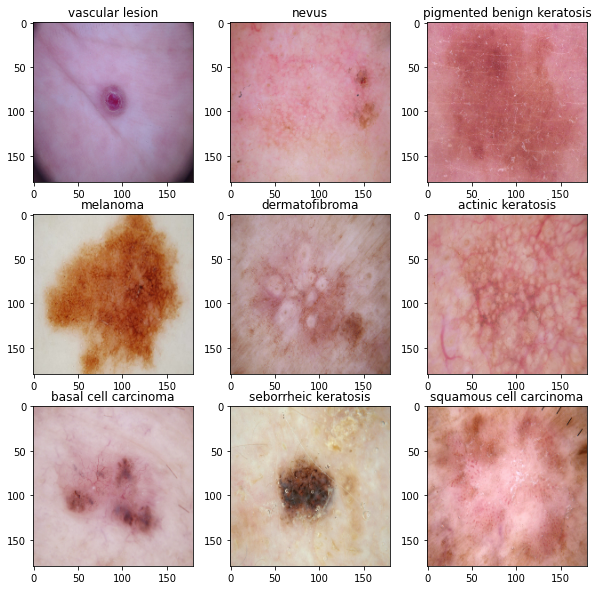

In [15]:


### your code goes here, you can use training or validation data to visualize

plot_idx=0
visited={}
visited_all=False
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(50):
  if not visited_all:
    for i in range(9):
    # print(images," | ",labels)
      # print(images.shape)
      # print(images[0].shape)
      # plt.figure(figsize=(20,20))
      if len(visited.keys())==9:
        visited_all=True
        break
      if class_names[labels[i]] in visited.keys():
        continue
      else:
        plt.subplot(3,3,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"));
        plt.title(class_names[labels[i]])
        visited[class_names[labels[i]]]="Y"
        plot_idx+=1
  else:
    break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
# Demo Cell

dataset = tf.data.Dataset.range(5)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.map(lambda x: x**2)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.cache()
# The first time reading through the data will generate the data using
# `range` and `map`.
print(list(dataset.as_numpy_iterator()))

# Subsequent iterations read from the cache.
print(list(dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]


In [17]:
dataset = tf.data.Dataset.range(3)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.prefetch(2)
print(list(dataset.as_numpy_iterator()))

[0, 1, 2]
[0, 1, 2]


In [18]:
# https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune

# https://medium.com/analytics-vidhya/tensorflow-2-0-tf-data-api-eaa9889186cc

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
### Your code goes here
num_classes = 9

# https://keras.io/api/layers/preprocessing_layers/image_preprocessing/rescaling/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

# Do all the possible playing with Hyperparameters to get the best model. See if you can get a model which
# is not overfitting or underfitting
# Write down proper insights about your model

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [20]:
# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss
# https://keras.io/api/optimizers/
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 64)        0

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 48s 138ms/step - loss: 3.6689 - accuracy: 0.1896 - val_loss: 1.9871 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 4s 73ms/step - loss: 1.8301 - accuracy: 0.3088 - val_loss: 1.7874 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 4s 73ms/step - loss: 1.7473 - accuracy: 0.3585 - val_loss: 1.8441 - val_accuracy: 0.3110
Epoch 4/20
56/56 [==============================] - 4s 73ms/step - loss: 1.6384 - accuracy: 0.4043 - val_loss: 1.5158 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 4s 73ms/step - loss: 1.3947 - accuracy: 0.5208 - val_loss: 1.5225 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 4s 73ms/step - loss: 1.3530 - accuracy: 0.5041 - val_loss: 1.6872 - val_accuracy: 0.4206
Epoch 7/20
56/56 [==============================] - 4s 73ms/step - loss: 1.3133 - accuracy: 0.5463 - val_loss: 1.4026 - val_accuracy: 0.5369
Epoch 8/20


### Visualizing training results

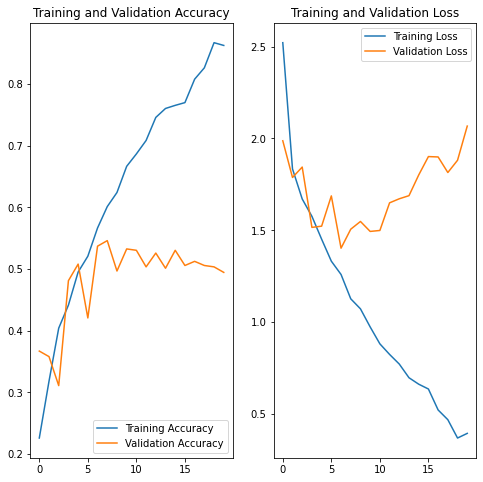

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=model.predict_classes(images)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.43      0.38      0.40        16
            dermatofibroma       0.33      0.06      0.11        16
                  melanoma       0.20      0.12      0.15        16
                     nevus       0.24      0.56      0.33        16
pigmented benign keratosis       0.35      0.81      0.49        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.25      0.19      0.21        16
           vascular lesion       1.00      0.67      0.80         3

                  accuracy                           0.31       118
                 macro avg       0.31      0.31      0.28       118
              weighted avg       0.27      0.31      0.25       118

********************
Accuracy on test dataset :  0.3050847457627119


In [26]:
# lets try the same model with more epochs and different opitmizer

num_classes = 9

model_rmsprop = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_rmsprop.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
history_rmsprop = model_rmsprop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
56/56 [==============================] - 5s 84ms/step - loss: 9.6772 - accuracy: 0.1713 - val_loss: 2.0822 - val_accuracy: 0.1544
Epoch 2/30
56/56 [==============================] - 4s 79ms/step - loss: 2.0075 - accuracy: 0.2836 - val_loss: 1.9949 - val_accuracy: 0.3423
Epoch 3/30
56/56 [==============================] - 4s 80ms/step - loss: 1.8717 - accuracy: 0.3664 - val_loss: 1.9132 - val_accuracy: 0.3647
Epoch 4/30
56/56 [==============================] - 4s 79ms/step - loss: 1.6966 - accuracy: 0.4128 - val_loss: 1.6403 - val_accuracy: 0.4899
Epoch 5/30
56/56 [==============================] - 4s 79ms/step - loss: 1.5182 - accuracy: 0.4715 - val_loss: 1.7361 - val_accuracy: 0.4228
Epoch 6/30
56/56 [==============================] - 4s 79ms/step - loss: 1.5074 - accuracy: 0.4851 - val_loss: 1.7376 - val_accuracy: 0.3781
Epoch 7/30
56/56 [==============================] - 4s 79ms/step - loss: 1.3714 - accuracy: 0.5367 - val_loss: 1.5689 - val_accuracy: 0.4586
Epoch 8/30
56

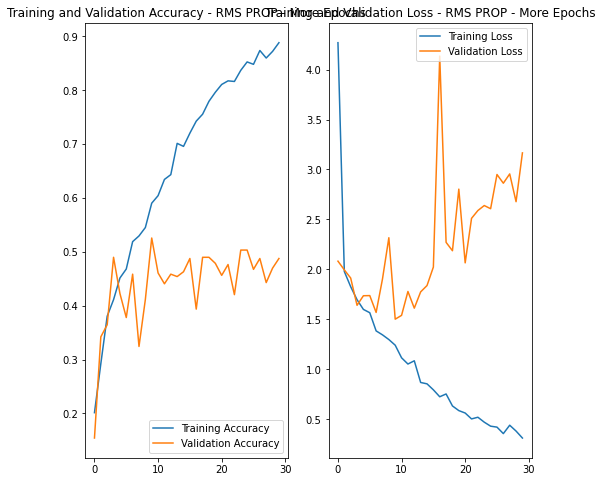

In [27]:
#visualizing results for different model

acc = history_rmsprop.history['accuracy']
val_acc = history_rmsprop.history['val_accuracy']

loss = history_rmsprop.history['loss']
val_loss = history_rmsprop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - RMS PROP - More Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - RMS PROP - More Epochs')
plt.show()

In [66]:
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=model_rmsprop.predict_classes(images)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("RMS prop Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

                            precision    recall  f1-score   support

         actinic keratosis       0.60      0.19      0.29        16
      basal cell carcinoma       0.45      0.31      0.37        16
            dermatofibroma       0.50      0.12      0.20        16
                  melanoma       0.17      0.25      0.21        16
                     nevus       0.20      0.44      0.27        16
pigmented benign keratosis       0.33      0.62      0.43        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.14      0.06      0.09        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.29       118
                 macro avg       0.34      0.30      0.28       118
              weighted avg       0.34      0.29      0.27       118

********************
RMS prop Accuracy on test dataset :  0.288135593220339


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
#### **Here we trained the same model with different optimizers (adams , rmsprop) and epochs(20 ,30) .As we can see  , till 6-7 epochs  training and validation accuracy both increase . But after that training accuracy keeps on increasing to 80% whereas validation accuracy keeps fluctuating at 50% . Which means has begun to overfit .**

In [28]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip

# Todo, after you have analysed the model fit history for presence of underfit or overfit, 
# choose an appropriate data augumentation strategy. 

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

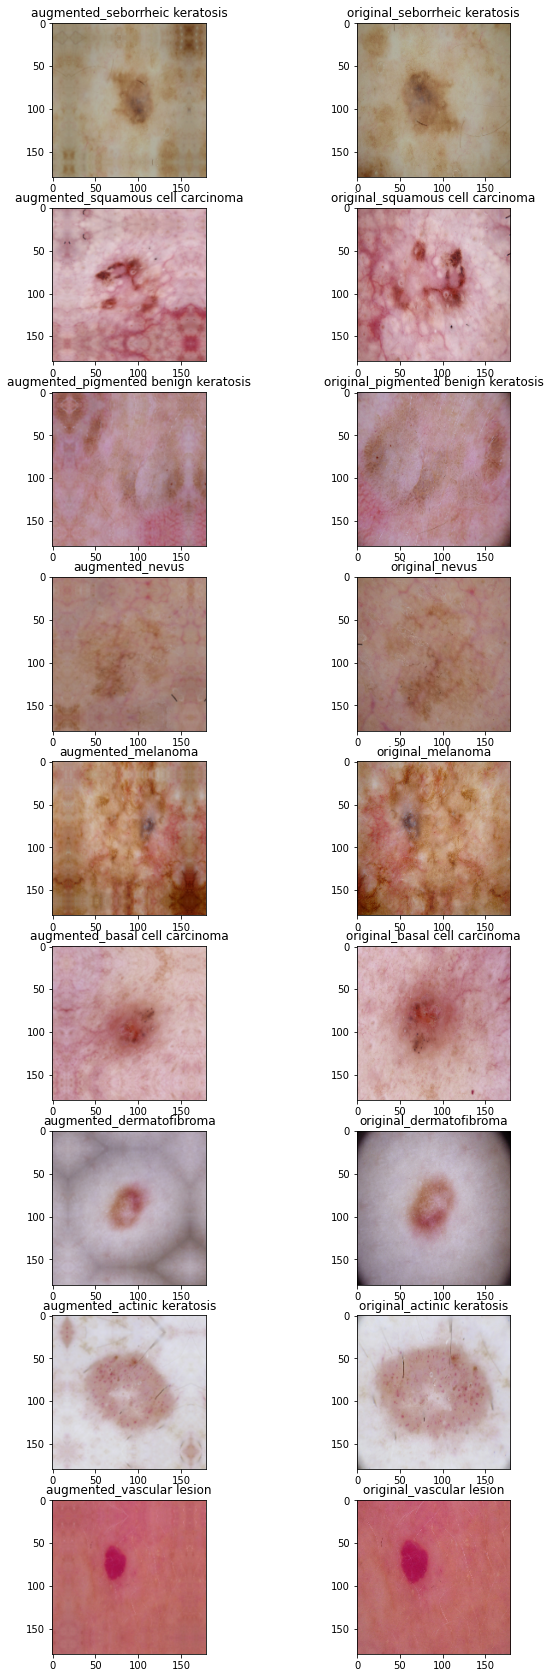

In [29]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plot_idx=0
visited={}
visited_all=False
plt.figure(figsize=(10,30))
for images, labels in train_ds.take(50):
  if not visited_all:
    for i in range(9):
    # print(images," | ",labels)
      # print(images.shape)
      # print(images[0].shape)
      # plt.figure(figsize=(20,20))
      if len(visited.keys())==9:
        visited_all=True
        break
      if class_names[labels[i]] in visited.keys():
        continue
      else:
        plt.subplot(9,2,plot_idx+1)
        x=data_aug(images)
        plt.imshow(x[i].numpy().astype("uint8"));
        # plt.imshow(images[i].numpy().astype("uint8"));
        plt.title("augmented_"+class_names[labels[i]])
        plot_idx+=1
        plt.subplot(9,2,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("original_"+class_names[labels[i]])
        visited[class_names[labels[i]]]="Y"
        plot_idx+=1
        
  else:
    break


# Do all the possible playing with Hyperparameters to get the best model. See if you can get a model which
# is not overfitting or underfitting
# Write down proper insights about your model

### Todo:
### Create the model, compile and train the model


In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss
# https://keras.io/api/optimizers/
### Todo, choose an appropirate optimiser and loss function


### Compiling the model

In [31]:
## Your code goes here
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 64)       

### Training the model

In [32]:
## Your code goes here, note: train your model for 20 epochs
# history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 81ms/step - loss: 4.1739 - accuracy: 0.1892 - val_loss: 2.1090 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 4s 78ms/step - loss: 1.9205 - accuracy: 0.2700 - val_loss: 1.8117 - val_accuracy: 0.3132
Epoch 3/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5975 - accuracy: 0.4497 - val_loss: 1.6235 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5799 - accuracy: 0.4202 - val_loss: 1.5500 - val_accuracy: 0.4273
Epoch 5/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5223 - accuracy: 0.4470 - val_loss: 1.5002 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 4s 78ms/step - loss: 1.4442 - accuracy: 0.4678 - val_loss: 1.4968 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.4473 - accuracy: 0.4869 - val_loss: 1.4296 - val_accuracy: 0.4944
Epoch 8/20
56

### Visualizing the results

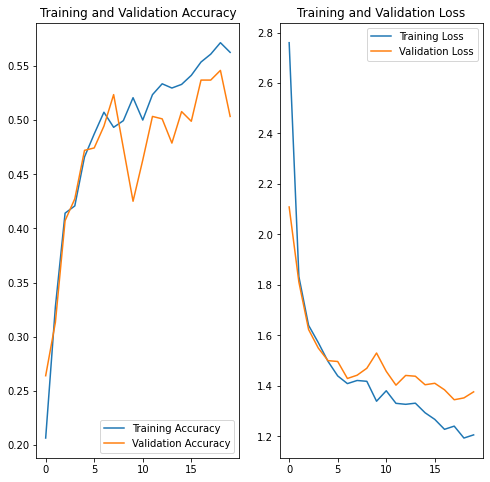

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
# try with different optimizer
model_aug_adagrad = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_aug_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_adagrad = model_aug_adagrad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/25
56/56 [==============================] - 5s 85ms/step - loss: 2.0923 - accuracy: 0.1736 - val_loss: 2.0498 - val_accuracy: 0.1790
Epoch 2/25
56/56 [==============================] - 4s 79ms/step - loss: 2.0345 - accuracy: 0.2153 - val_loss: 2.0176 - val_accuracy: 0.2819
Epoch 3/25
56/56 [==============================] - 4s 79ms/step - loss: 2.0342 - accuracy: 0.2311 - val_loss: 2.0147 - val_accuracy: 0.2640
Epoch 4/25
56/56 [==============================] - 4s 79ms/step - loss: 1.9963 - accuracy: 0.2611 - val_loss: 2.0052 - val_accuracy: 0.2931
Epoch 5/25
56/56 [==============================] - 4s 79ms/step - loss: 1.9613 - accuracy: 0.2859 - val_loss: 1.9865 - val_accuracy: 0.3020
Epoch 6/25
56/56 [==============================] - 4s 78ms/step - loss: 1.9438 - accuracy: 0.2954 - val_loss: 1.9421 - val_accuracy: 0.2685
Epoch 7/25
56/56 [==============================] - 4s 78ms/step - loss: 1.9307 - accuracy: 0.2893 - val_loss: 1.9491 - val_accuracy: 0.3244
Epoch 8/25
56

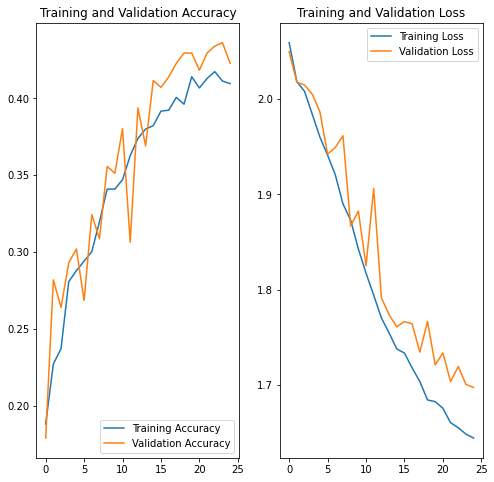

In [35]:
# creating a performance visualisation for adagrad optimiser
acc = history_aug_adagrad.history['accuracy']
val_acc = history_aug_adagrad.history['val_accuracy']

loss = history_aug_adagrad.history['loss']
val_loss = history_aug_adagrad.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
# creating another model with SGD opitmizer
model_aug_sgd = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_aug_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_sgd = model_aug_sgd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 5s 78ms/step - loss: 2.1207 - accuracy: 0.1767 - val_loss: 2.0672 - val_accuracy: 0.2975
Epoch 2/25
56/56 [==============================] - 4s 76ms/step - loss: 2.0150 - accuracy: 0.2247 - val_loss: 2.0245 - val_accuracy: 0.3400
Epoch 3/25
56/56 [==============================] - 4s 76ms/step - loss: 1.9773 - accuracy: 0.2901 - val_loss: 1.9422 - val_accuracy: 0.4027
Epoch 4/25
56/56 [==============================] - 4s 76ms/step - loss: 1.9696 - accuracy: 0.2716 - val_loss: 1.9391 - val_accuracy: 0.3110
Epoch 5/25
56/56 [==============================] - 4s 76ms/step - loss: 1.9099 - accuracy: 0.3110 - val_loss: 1.8697 - val_accuracy: 0.3736
Epoch 6/25
56/56 [==============================] - 4s 76ms/step - loss: 1.8914 - accuracy: 0.3034 - val_loss: 1.8420 - val_accuracy: 0.3691
Epoch 7/25
56/56 [==============================] - 4s 76ms/step - loss: 1.8324 - accuracy: 0.3201 - val_loss: 1.7425 - val_accuracy: 0.3848
Epoch 8/25
56

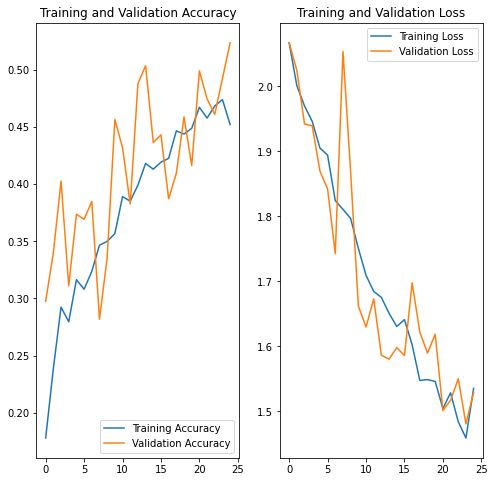

In [37]:
# creating performance visualisation for sgd optimizer
acc = history_aug_sgd.history['accuracy']
val_acc = history_aug_sgd.history['val_accuracy']

loss = history_aug_sgd.history['loss']
val_loss = history_aug_sgd.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=model.predict_classes(images)
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=model_aug_adagrad.predict_classes(images)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=model_aug_sgd.predict_classes(images)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)

Adam optimizer
                            precision    recall  f1-score   support

         actinic keratosis       1.00      0.19      0.32        16
      basal cell carcinoma       0.40      0.50      0.44        16
            dermatofibroma       0.00      0.00      0.00        16
                  melanoma       0.25      0.31      0.28        16
                     nevus       0.52      0.75      0.62        16
pigmented benign keratosis       0.26      0.62      0.37        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.17      0.12      0.14        16
           vascular lesion       1.00      0.67      0.80         3

                  accuracy                           0.36       118
                 macro avg       0.40      0.35      0.33       118
              weighted avg       0.38      0.36      0.31       118

Accuracy on test dataset :  0.3559322033898305
********************
Adagrad optimizer
            

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


#### <u>Findings</u> <b>We can see that after addition of Agumentation layers we were able to reduce the model's overfitting .  However in this case the model is not able to generalise well . We tried out different set of optmizers sgd , adagrad , adams which gave models that had low Training and Validation accuracy. The accuracy figures were between 45-55% both for training and validation . But now the model has begun to overfit.</b>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [39]:
train_path_list = list(data_dir_train.glob('*/*.jpg'))

In [40]:
# dct={}
# for x in train_path_list:
#   result=str(x).split("/")
#   if result[2] in dct.keys():
#     dct[result[2]]+=1
#   else:
#     dct[result[2]]=1

In [41]:
# cancer=[]
# count=[]
# for k,v in dct.items():
#   cancer.append(k)
#   count.append(v)

df=pd.DataFrame({"cancer_type":[str(x).split("/")[2] for x in train_path_list]})

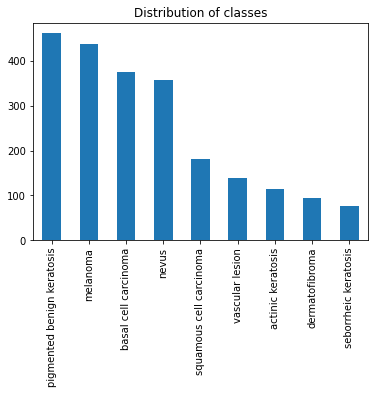

In [65]:
df['cancer_type'].value_counts().plot(kind='bar')
plt.title("Distribution of classes")
plt.show()

In [43]:
## Your code goes here.
# dataframe_dict_original = dict(zip(path_list, lesion_list))
# original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
# original_df

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### **Ans : seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
#### <b>Ans : pigmented benign keratosis</b>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [44]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [45]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED7054A190>: 100%|██████████| 500/500 [00:15<00:00, 32.53 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED1472F850>: 100%|██████████| 500/500 [00:15<00:00, 32.03 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FED7054A0D0>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED147BDFD0>: 100%|██████████| 500/500 [00:15<00:00, 31.51 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FED26583E90>: 100%|██████████| 500/500 [01:26<00:00,  5.78 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7FED70506950>: 100%|██████████| 500/500 [01:18<00:00,  6.34 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED1472F190>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED704C1690>: 100%|██████████| 500/500 [00:15<00:00, 31.37 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FED7057E1D0>: 100%|██████████| 500/500 [00:39<00:00, 12.50 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED262BA710>: 100%|██████████| 500/500 [00:16<00:00, 31.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED26051E10>: 100%|██████████| 500/500 [00:16<00:00, 31.21 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [46]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [47]:
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [48]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [49]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [50]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [51]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2) 

In [52]:
#created 500 samples for each
df2['Label'].value_counts()

actinic keratosis             500
melanoma                      500
dermatofibroma                500
nevus                         500
pigmented benign keratosis    500
basal cell carcinoma          500
squamous cell carcinoma       500
seborrheic keratosis          500
vascular lesion               500
Name: Label, dtype: int64

In [80]:
#new counts
new_list=list(df['cancer_type'].values)
new_list.extend(list(df2['Label'].values))
len(new_list)
final_df=pd.DataFrame({"cancer_type":new_list})
final_df['cancer_type'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: cancer_type, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [53]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [54]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [56]:
## your code goes here
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.40),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.40),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [57]:
## your code goes here
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [58]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 41s 233ms/step - loss: 5.8373 - accuracy: 0.1322 - val_loss: 2.1905 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 40s 231ms/step - loss: 2.1851 - accuracy: 0.1379 - val_loss: 2.1868 - val_accuracy: 0.1403
Epoch 3/50
169/169 [==============================] - 40s 229ms/step - loss: 2.1580 - accuracy: 0.1702 - val_loss: 1.8825 - val_accuracy: 0.2940
Epoch 4/50
169/169 [==============================] - 40s 229ms/step - loss: 1.7151 - accuracy: 0.3480 - val_loss: 1.7998 - val_accuracy: 0.3036
Epoch 5/50
169/169 [==============================] - 40s 230ms/step - loss: 1.5835 - accuracy: 0.3963 - val_loss: 1.5443 - val_accuracy: 0.4061
Epoch 6/50
169/169 [==============================] - 40s 229ms/step - loss: 1.4336 - accuracy: 0.4471 - val_loss: 1.3962 - val_accuracy: 0.4959
Epoch 7/50
169/169 [==============================] - 40s 230ms/step - loss: 1.3132 - accuracy: 0.5073 - val_loss: 1.2833 - val_ac

#### **Todo:**  Visualize the model results

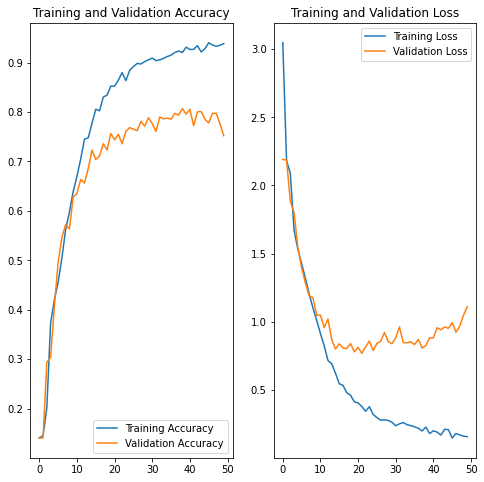

In [59]:
# plot for ADaM optimizer
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
#trying with a different model optimizer 
model_imbalance_sgd = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_imbalance_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
## Your code goes here, use 50 epochs.
history_imbalance_sgd = model_imbalance_sgd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 40s 231ms/step - loss: 2.2066 - accuracy: 0.1509 - val_loss: 2.1674 - val_accuracy: 0.1210
Epoch 2/30
169/169 [==============================] - 41s 236ms/step - loss: 2.1165 - accuracy: 0.1926 - val_loss: 2.0291 - val_accuracy: 0.2272
Epoch 3/30
169/169 [==============================] - 40s 229ms/step - loss: 2.0192 - accuracy: 0.2318 - val_loss: 2.0124 - val_accuracy: 0.2524
Epoch 4/30
169/169 [==============================] - 40s 231ms/step - loss: 1.9229 - accuracy: 0.2756 - val_loss: 1.9344 - val_accuracy: 0.2673
Epoch 5/30
169/169 [==============================] - 40s 229ms/step - loss: 1.8154 - accuracy: 0.3201 - val_loss: 1.7156 - val_accuracy: 0.3920
Epoch 6/30
169/169 [==============================] - 40s 229ms/step - loss: 1.7302 - accuracy: 0.3605 - val_loss: 1.6538 - val_accuracy: 0.4009
Epoch 7/30
169/169 [==============================] - 40s 230ms/step - loss: 1.6166 - accuracy: 0.4008 - val_loss: 1.7108 - val_ac

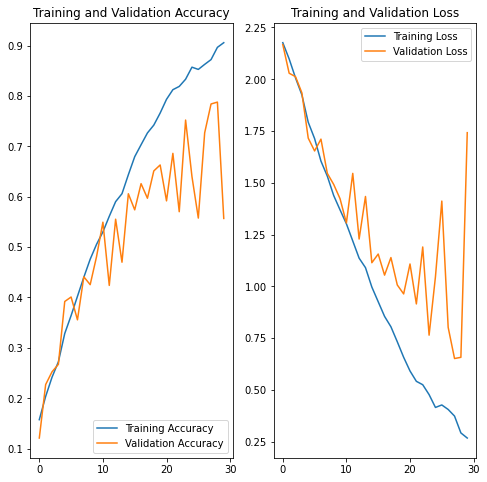

In [61]:
# plot for SGD optimizer
acc = history_imbalance_sgd.history['accuracy']
val_acc = history_imbalance_sgd.history['val_accuracy']

loss = history_imbalance_sgd.history['loss']
val_loss = history_imbalance_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
#trying with a different model 
model_imbalance_adagrad = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_imbalance_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
## Your code goes here, use 50 epochs.
history_imbalance_adagrad = model_imbalance_adagrad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 41s 233ms/step - loss: 2.1923 - accuracy: 0.1456 - val_loss: 2.1563 - val_accuracy: 0.1678
Epoch 2/30
169/169 [==============================] - 40s 233ms/step - loss: 2.1302 - accuracy: 0.1800 - val_loss: 2.1014 - val_accuracy: 0.2249
Epoch 3/30
169/169 [==============================] - 40s 232ms/step - loss: 2.0598 - accuracy: 0.2227 - val_loss: 2.0009 - val_accuracy: 0.2777
Epoch 4/30
169/169 [==============================] - 40s 234ms/step - loss: 1.9410 - accuracy: 0.2805 - val_loss: 1.9004 - val_accuracy: 0.3051
Epoch 5/30
169/169 [==============================] - 41s 234ms/step - loss: 1.8325 - accuracy: 0.3225 - val_loss: 1.7921 - val_accuracy: 0.3601
Epoch 6/30
169/169 [==============================] - 41s 235ms/step - loss: 1.7496 - accuracy: 0.3491 - val_loss: 1.7930 - val_accuracy: 0.3274
Epoch 7/30
169/169 [==============================] - 41s 239ms/step - loss: 1.6955 - accuracy: 0.3821 - val_loss: 1.7135 - val_ac

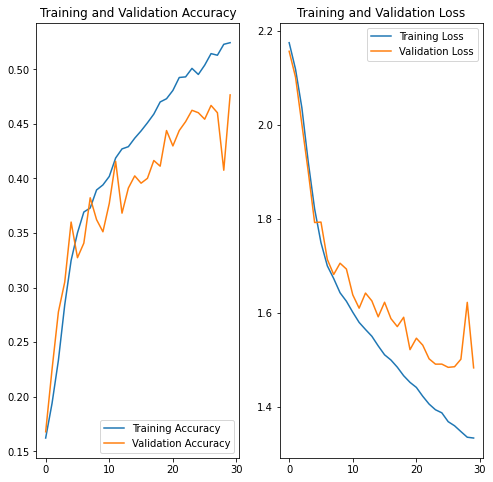

In [63]:
#visualizing for adagrad
acc = history_imbalance_adagrad.history['accuracy']
val_acc = history_imbalance_adagrad.history['val_accuracy']

loss = history_imbalance_adagrad.history['loss']
val_loss = history_imbalance_adagrad.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

So we tried out the model with different epoch (30,50) and optimizers (adam, sgd , adaagrad) .  The initial model with adam optimizer with 50 epochs seems to work well with validation accuracy reaching about 80% .

In [64]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=model.predict_classes(images)
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=model_imbalance_adagrad.predict_classes(images)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=model_imbalance_sgd.predict_classes(images)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)

Adam optimizer
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.36      0.25      0.30        16
            dermatofibroma       0.54      0.44      0.48        16
                  melanoma       0.25      0.31      0.28        16
                     nevus       0.19      0.31      0.23        16
pigmented benign keratosis       0.33      0.62      0.43        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.33      0.19      0.24        16
           vascular lesion       0.33      0.33      0.33         3

                  accuracy                           0.30       118
                 macro avg       0.26      0.27      0.26       118
              weighted avg       0.28      0.30      0.27       118

Accuracy on test dataset :  0.2966101694915254
********************
Adagrad optimizer
            

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### <b>We tried different models with optimizers (sgd, adams, adagrad) and epochs (30,50,30) . By adding augmented images which inturn helped in handling class imbalance , we mitigated/addressed the problem of overfitting . Out of all the models the performance was decent for the model with Adam's optimizer . The model had a train accuracy of ~90% while the validation accuracy was about ~80% . This model learns rapidly (increase in training and validation accuracy)for the first 20 epochs , but after this the learning becomes slow </b>.